
# iNaturalist Observations Preview

This notebook loads the cached iNaturalist observations stored at `../data/inaturalist_snakes.geojson`.
Run the cells below after refreshing the dataset with `python scripts/fetch_inaturalist.py data/study_area.geojson 31191 data/inaturalist_snakes.geojson`.


In [1]:

from pathlib import Path
import geopandas as gpd

inat_path = Path("../data/inaturalist_snakes.geojson")
study_path = Path("../data/study_area.geojson")

inat_gdf = gpd.read_file(inat_path)
study_gdf = gpd.read_file(study_path)

print(f"Observations loaded: {len(inat_gdf)}")
if inat_gdf.empty:
    print("⚠️ No iNaturalist features are present in the current export. Try refetching with a different taxon or quality grade.")
else:
    display(inat_gdf.head()[[col for col in ["id", "species_guess", "observed_on", "quality_grade"] if col in inat_gdf.columns]])


Observations loaded: 1000


,id,species_guess,observed_on,quality_grade
0,326850421,Gopher Snake,2025-11-16,research
1,326813962,Tiger Rattlesnake,2025-11-16,research
2,326553959,Desert Nightsnake,2025-11-14,research
3,326617713,Gopher Snake,2025-11-14,research
4,326416254,Western Diamond-backed Rattlesnake,2025-11-13,research


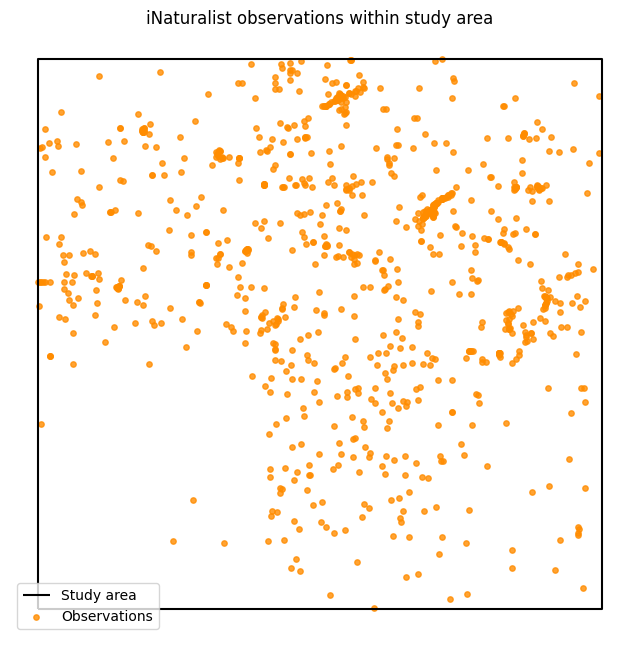

In [2]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
study_gdf.boundary.plot(ax=ax, color="black", linewidth=1.5, label="Study area")

if inat_gdf.empty:
    ax.text(
        0.5,
        0.5,
        "No iNaturalist observations to plot",
        transform=ax.transAxes,
        ha="center",
        va="center",
        fontsize=12,
    )
else:
    inat_gdf.plot(ax=ax, color="darkorange", markersize=15, alpha=0.8, label="Observations")

ax.set_title("iNaturalist observations within study area")
ax.set_axis_off()
ax.legend(loc="lower left")
plt.show()
